# Projeto 2 - Classificador Automático de Sentimento

Você foi contratado por uma empresa parar analisar como os clientes estão reagindo a um determinado produto no Twitter. A empresa deseja que você crie um programa que irá analisar as mensagens disponíveis e classificará como "relevante" ou "irrelevante". Com isso ela deseja que mensagens negativas, que denigrem o nome do produto, ou que mereçam destaque, disparem um foco de atenção da área de marketing.<br /><br />
Como aluno de Ciência dos Dados, você lembrou do Teorema de Bayes, mais especificamente do Classificador Naive-Bayes, que é largamente utilizado em filtros anti-spam de e-mails. O classificador permite calcular qual a probabilidade de uma mensagem ser relevante dadas as palavras em seu conteúdo.<br /><br />
Para realizar o MVP (*minimum viable product*) do projeto, você precisa implementar uma versão do classificador que "aprende" o que é relevante com uma base de treinamento e compara a performance dos resultados com uma base de testes.<br /><br />
Após validado, o seu protótipo poderá também capturar e classificar automaticamente as mensagens da plataforma.

## Informações do Projeto

Prazo: 13/Set até às 23:59.<br />
Grupo: 1 ou 2 pessoas.<br /><br />
Entregáveis via GitHub: 
* Arquivo notebook com o código do classificador, seguindo as orientações abaixo.
* Arquivo Excel com as bases de treinamento e teste totalmente classificado.

**NÃO disponibilizar o arquivo com os *access keys/tokens* do Twitter.**


### Check 3: 

Até o dia 06 de Setembro às 23:59, o notebook e o xlsx devem estar no Github com as seguintes evidências: 
    * Conta no twitter criada.
    * Produto escolhido.
    * Arquivo Excel contendo a base de treinamento e teste já classificado.
    

Sugestão de leitura:<br />
http://docs.tweepy.org/en/v3.5.0/index.html<br />
https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/

___

## Preparando o ambiente

Instalando a biblioteca *tweepy* para realizar a conexão com o Twitter:

In [205]:
%%capture

#Instalando o tweepy
!pip install tweepy

Importando as Bibliotecas que serão utilizadas. Esteja livre para adicionar outras.

In [286]:
import tweepy
import math
import os.path
import pandas as pd
import json
from random import shuffle
import matplotlib.pyplot as plt

___
## Autenticando no  Twitter

Para realizar a captura dos dados é necessário ter uma conta cadastrada no twitter:

* Conta: ***[Preencha aqui o id da sua conta. Ex: @fulano ]***


1. Caso ainda não tenha uma: https://twitter.com/signup
1. Depois é necessário registrar um app para usar a biblioteca: https://apps.twitter.com/
1. Dentro do registro do App, na aba Keys and Access Tokens, anotar os seguintes campos:
    1. Consumer Key (API Key)
    1. Consumer Secret (API Secret)
1. Mais abaixo, gere um Token e anote também:
    1. Access Token
    1. Access Token Secret
    
1. Preencha os valores no arquivo "auth.pass"

**ATENÇÃO**: Nunca divulgue os dados desse arquivo online (GitHub, etc). Ele contém as chaves necessárias para realizar as operações no twitter de forma automática e portanto é equivalente a ser "hackeado". De posse desses dados, pessoas mal intencionadas podem fazer todas as operações manuais (tweetar, seguir, bloquear/desbloquear, listar os seguidores, etc). Para efeito do projeto, esse arquivo não precisa ser entregue!!!

In [207]:
#Dados de autenticação do twitter:

#Coloque aqui o identificador da conta no twitter: @elijose55

#leitura do arquivo no formato JSON
with open('auth.pass') as fp:    
    data = json.load(fp)

#Configurando a biblioteca. Não modificar
auth = tweepy.OAuthHandler(data['consumer_key'], data['consumer_secret'])
auth.set_access_token(data['access_token'], data['access_token_secret'])

___
## Coletando Dados

Agora vamos coletar os dados. Tenha em mente que dependendo do produto escolhido, não haverá uma quantidade significativa de mensagens, ou ainda poder haver muitos retweets.<br /><br /> 
Configurando:

In [208]:
#Produto escolhido:
produto = 'smirnoff'

#Quantidade mínima de mensagens capturadas:
n = 500
#Quantidade mínima de mensagens para a base de treinamento:
t = 300

#Filtro de língua, escolha uma na tabela ISO 639-1.
lang = 'pt'

Capturando os dados do twitter:

In [209]:
#Cria um objeto para a captura
api = tweepy.API(auth)

#Inicia a captura, para mais detalhes: ver a documentação do tweepy
i = 1
msgs = []
for msg in tweepy.Cursor(api.search, q=produto, lang=lang).items():    
    msgs.append(msg.text.lower())
    i += 1
    if i > n:
        break

#Embaralhando as mensagens para reduzir um possível viés
shuffle(msgs)

Salvando os dados em uma planilha Excel:

In [210]:
#Verifica se o arquivo não existe para não substituir um conjunto pronto
if not os.path.isfile('./{0}.xlsx'.format(produto)):
    
    #Abre o arquivo para escrita
    writer = pd.ExcelWriter('{0}.xlsx'.format(produto))

    #divide o conjunto de mensagens em duas planilhas
    dft = pd.DataFrame({'Treinamento' : pd.Series(msgs[:t])})
    dft.to_excel(excel_writer = writer, sheet_name = 'Treinamento', index = False)

    dfc = pd.DataFrame({'Teste' : pd.Series(msgs[t:])})
    dfc.to_excel(excel_writer = writer, sheet_name = 'Teste', index = False)

    #fecha o arquivo
    writer.save()

___
## Classificando as Mensagens

Agora você deve abrir o arquivo Excel com as mensagens capturadas e classificar na Coluna B se a mensagem é relevante ou não.<br /> 
Não se esqueça de colocar um nome para a coluna na célula **B1**.<br /><br />
Fazer o mesmo na planilha de Controle.

___
## Montando o Classificador Naive-Bayes

Com a base de treinamento montada, comece a desenvolver o classificador. Escreva o seu código abaixo:

Opcionalmente: 
* Limpar as mensagens removendo os caracteres: enter, :, ", ', (, ), etc. Não remover emojis.<br />
* Corrigir separação de espaços entre palavras e/ou emojis.
* Propor outras limpezas/transformações que não afetem a qualidade da informação.



In [282]:
stop = ['©','smirnoff', '(', ')','&','[',']','.',',', '#','*','%','_','=','\\','\n',' mais ',' quando ',' depois ',' sem ']


dados = pd.read_excel('smirnoff.xlsx',sep=',')

for word in stop: dados['Treinamento'] = dados['Treinamento'].str.replace(word, ' ')  #remover stop words

    
    
    
    
    
#
g = (dados['Relevante'].value_counts(sort=False, normalize=True)*100).round(decimals=1)  #frequencia de rel e nao rel

pr = g['Sim'] #probabilidade de ser relevante
pn = g['Nao'] #probabilidade de nao ser relevante
#

#
t = dados.Treinamento.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0) #frequencia absoluta de cada palavra
tr = dados.Treinamento[dados.Relevante == 'Sim'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0) #frequencia absoluta de cada palavra nos relevante
tn = dados.Treinamento[dados.Relevante == 'Nao'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0) #frequencia absoluta de cada palavra nos nao relevantes
nr = tr[0]  #numero total absoluto de palavras nos relevantes
nn = tn[0]  #numero total absoluto de palavras nos nAO relevantes
n = len(t) #numero total de palavras (sem contar repeticoes) (possible words)

nr = nr.item()
nn = nn.item()

nr = int(nr)
nn = int(nn)


freqr = pd.DataFrame(tr)
freqn = pd.DataFrame(tn)



lf = []  #lista das frequencias de cada palavra nos RELEVANTES

ln = [] #lista das frequencias de cada palavra nos NAO RELEVANTES


for i in range(len(freqr)):
    x = (((freqr.iat[i,0])+1)/(nr+n))*pr
    lf.append(x)
    

for i in range(len(freqn)):
    x = (((freqn.iat[i,0])+1)/(nn+n))*pn
    ln.append(x)

lr = freqr.index.tolist() #lista de palavras
l = freqn.index.tolist() #lista de palavras


dr = {}

dn = {}

for i in range(len(freqr)):
    dr[lr[i]] = lf[i]
    
for i in range(len(freqn)):
    dn[l[i]] = ln[i]

    
  

    


#variaveis e dict necessarios:  pr , pn, dn, dr



teste = pd.read_excel('smirnoff.xlsx',sep=',', sheetname="Teste")
teste
for index, row in teste.iterrows():
    y1 = 1
    y2 = 1

    p = row['Teste'] #proprio tweet
    l = p.split() #lista de palavras de um tweet
    for i in l:
        if i in dr:
            y1 *= (dr[i])
        if i in dn:
            y2 *= (dn[i])
    if y1>y2:
        teste.set_value(index, 'Relevante', 'Sim')        
        
    else:
        teste.set_value(index, 'Relevante', 'Nao')

            
            
            

writer = pd.ExcelWriter('resultado.xlsx', engine='xlsxwriter')


teste.to_excel(writer, sheet_name='Testado')

writer.save()


        
    






___
## Verificando a performance

Agora você deve testar o seu Classificador com a base de Testes.<br /><br /> 

Você deve extrair as seguintes medidas:
* Porcentagem de positivos falsos (marcados como relevante mas não são relevantes)
* Porcentagem de positivos verdadeiros (marcado como relevante e são relevantes)
* Porcentagem de negativos verdadeiros (marcado como não relevante e não são relevantes)
* Porcentagem de negativos falsos (marcado como não relevante e são relevantes)

Opcionalmente:
* Criar categorias intermediárias de relevância baseado na diferença de probabilidades. Exemplo: muito relevante, relevante, neutro, irrelevante e muito irrelevante.

Porcentagens: 

Positivo verdadeiro: 2.5%
Positivo falso: 10.0%
Negativo verdadeiro: 65.5%
Negativo falso: 22.0%


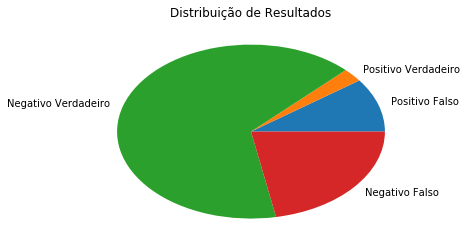

In [289]:
real = pd.read_excel('smirnoff.xlsx',sep=',', sheetname="Teste")
pf = 0
pv = 0
nv = 0
nf = 0

for index, row in teste.iterrows():
    p1 = row['Relevante']
    p2 = real.Relevante[index]
    if p1 =='Sim' and p2 == 'Sim':
        pv+=1
    if p1 =='Sim' and p2 == 'Nao':
        pf+=1
    if p1 =='Nao' and p2 == 'Nao':
        nv+=1
    if p1 =='Nao' and p2 == 'Sim':
        nf+=1
print('Porcentagens: \n')       
print('Positivo verdadeiro: {0}%' .format(pv*100/tt))
print('Positivo falso: {0}%' .format(pf*100/tt))
print('Negativo verdadeiro: {0}%' .format(nv*100/tt))
print('Negativo falso: {0}%' .format(nf*100/tt))
        

plt.pie([pf,pv,nv,nf], labels=['Positivo Falso', 'Positivo Verdadeiro', 'Negativo Verdadeiro', 'Negativo Falso'])
plt.title('Distribuição de Resultados')
plt.show()

___
## Concluindo

Escreva aqui a sua conclusão.<br /> 
Faça um comparativo qualitativo sobre as medidas obtidas.<br />
Explique como são tratadas as mensagens com dupla negação e sarcasmo.<br />
Proponha um plano de expansão. Por que eles devem continuar financiando o seu projeto?<br />

Opcionalmente: 
* Discorrer por que não posso alimentar minha base de Treinamento automaticamente usando o próprio classificador, aplicado a novos tweets.
* Propor diferentes cenários de uso para o classificador Naive-Bayes. Cenários sem intersecção com este projeto.
* Sugerir e explicar melhorias reais no classificador com indicações concretas de como implementar (não é preciso codificar, mas indicar como fazer e material de pesquisa sobre o assunto).


#### Considerando os resultados encontrados é possível perceber que o classificador tem mais êxito em identificar mensagens como não relevantes, já que o percentual de positivos verdadeiros é baixo e o percentual de negativos falsos é alto. Assim, pode-se afirmar que o programa tem uma imprecisão em identificar tweets relevantes sobre o produto, mas ainda sim considerando o método os valores obtidos foram aceitáveis. Outro ponto importante a ser notado é relacionado com os tweets com dupla negação e sarcasmo. Como o programa analisa palavra por palavra, ele não consegue reconhecer as mensagens com esses fatores em sua classificação, já que o sarcasmo e a dupla negação são criados a partir da combinação de palavras. Por fim, considerando os percentuais obtidos, o classificador funciona relativamente bem e pode certamente substituir o trabalho muito mas demorado mas mais preciso de uma equipe humana. Além disso, com alterações nas chamadas "stop words", ou seja, palavras que são mais utilizadas e aparecem em ambos os tipo de tweets, será possível obter uma precisão mais satisfatória. Por isso, a empresa deveria continuar com o financiamento do projeto, pois ele tem uma grande margem de melhora dos percentuais e ainda permitirá a coleta de dados negativos e relevantes sobre o produto nas redes sociais muito mais rapidamente do que uma equipe humana faria.